# Circularity, aspect ratios and area errors

In [1]:
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
import math

In [2]:
# Reads .csv containing all the particle data
raw_data = pd.read_csv("All_particle_data.csv")
raw_data.head()

,Area,Major,Minor,Angle,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,1.971,1.783,1.407,33.746,0.933,1.884,133,169,34.992,1.473,1.267,0.789,0.951
1,1.351,1.623,1.060,14.771,0.867,1.685,186,162,15.945,1.122,1.531,0.653,0.927
2,1.101,1.580,0.888,149.132,0.759,1.669,243,153,146.310,1.035,1.780,0.562,0.896
3,1.762,1.973,1.137,16.385,0.840,2.006,348,165,22.620,1.195,1.735,0.576,0.943
4,13.533,4.477,3.849,150.831,0.826,4.834,387,158,151.390,4.129,1.163,0.860,0.970


# Circularity

Here the circularity data are plotted for all of the measured particles.

In [3]:
circ_bins = np.linspace(0,1,21) # Creates bins for the circularity data

In [4]:
# Places data into bins, outputting 2 arrays: 
# binned data (counts) and bins
circ_counts, circ_bins_out = np.histogram(raw_data['Circ.'], circ_bins)

#Creates new dataframe to hold the circularity data
circ_data = pd.DataFrame()
circ_data['Bins_lower'] = circ_bins_out[:-1]
circ_data['Counts'] = circ_counts
# Creates column with particle fraction data
circ_data['norm_counts'] = circ_counts/len(raw_data)

In [5]:
# Finds the mean circularity of the raw data
mean_circ = sum(raw_data['Circ.'])/len(raw_data)

Text(0.15, 0.85, 'n = 6731\n$\\mu$ = 0.75')

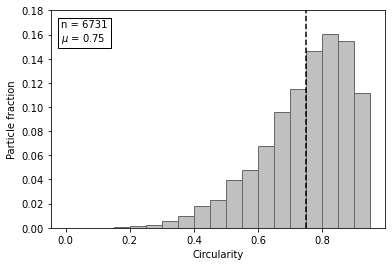

In [6]:
# Plots the circularity data against particle fraction
ax = plt.figure()
plt.hist(circ_bins_out[:-1], circ_bins_out[:-1], \
         weights=circ_data['norm_counts'], \
         color='silver', density=False, edgecolor='dimgrey')
plt.xlabel('Circularity')
plt.ylabel('Particle fraction')

# Plots a line for the mean of the data
plt.plot([mean_circ, mean_circ],[0,1], linestyle='dashed', color='black')
max_bin_height = round(circ_data['norm_counts'].max(),2)
plt.ylim([0,max_bin_height+0.02])

# Adds a box with the total particle count and mean of the data
ax.text(.15, .85, f"n = {len(raw_data)}\n$\mu$ = \
{round(mean_circ,2)}", horizontalalignment="left", \
        verticalalignment="top", bbox=dict(boxstyle = "square",
                  facecolor = "white"))
#plt.savefig('Circularity', format='eps')

# Particle aspect ratios

Here the aspect ratios of all the particle data are plotted

In [7]:
# Finds the maximum aspect ratio of all particles
max_AR = raw_data['AR'].max()
# Rounds the maximumm aspect ratio up to the nearest integer
max_AR_bin = math.ceil(max_AR)

# Creates bins to hold the aspect ratio data
AR_bins = np.linspace(1,max_AR_bin,(max_AR_bin*2)-1)

In [8]:
# Places data into bins, outputting 2 arrays:
# binned data (counts) and bins
AR_counts, AR_bins_out = np.histogram(raw_data['AR'], AR_bins)

#Creates new dataframe to hold the aspect ratio data
AR_data = pd.DataFrame()
AR_data['Bins_lower'] = AR_bins_out[:-1]
AR_data['Counts'] = AR_counts
# Creates column with particle fraction data
AR_data['norm_counts'] = AR_counts/len(raw_data)

In [9]:
# Finds the mean aspect ratio of the raw data
mean_AR = sum(raw_data['AR'])/len(raw_data)

Text(0.87, 0.85, 'n = 6731\n$\\mu$ = 1.91')

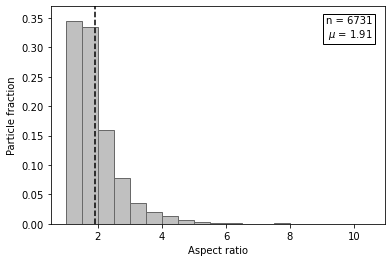

In [10]:
# Plots the aspect ratio data against particle fraction
ax = plt.figure()
plt.hist(AR_bins_out[:-1], AR_bins_out[:-1], \
         weights=AR_data['norm_counts'], \
         color='silver', density=False, edgecolor='dimgrey')
plt.xlabel('Aspect ratio')
plt.ylabel('Particle fraction')

# Plots a line for the mean of the data
plt.plot([mean_AR, mean_AR],[0,1], linestyle='dashed', color='black')
max_bin_height = round(AR_data['norm_counts'].max(),2)
plt.ylim([0,max_bin_height+0.02])

# Adds a box with the total particle count and mean of the data
ax.text(.87, .85, f"n = {len(raw_data)}\n$\mu$ = \
{round(mean_AR,2)}", horizontalalignment="right", \
        verticalalignment="top", bbox=dict(boxstyle = "square",
                  facecolor = "white"))
#plt.savefig('Aspect_ratio', format='eps')

# Area errors from spherical assumption

As particles are not truly spherical there will be an error associated with this assumption made for the stereological conversion and sintering calculations. Here this error is quantified by considering the effects on the volume calculations of the particle data above.

When constructing a particle-size distribution from 2D images the third (depth) dimension of the particles will always be unconstrained and therefore only rotational ellipsoids can be considered. Here we consider the volume errors created by sphericity for oblate or prolate spheroids.

# The average particle

First, the average particle in the dataset is considered. The volume of this particle can be calculated from its area, assuming that the particle is perfectly spherical.

In [11]:
# Calculates the mean area of a particle
mean_area = sum(raw_data['Area'])/len(raw_data)

# Assuming perfectly circular particles, the mean radius is calculated 
mean_r = (mean_area/ math.pi)**0.5
round(mean_r,2)

9.64

In [12]:
# Assuming spherical particles, the mean volume can be calculated
mean_volume = 4/3 * math.pi * mean_r**3
mean_volume

3757.7764307575003

The aspect ratio of each particle indicate how far from sphericity each particle is. Using the mean aspect ratio we can calculate the volume of the oblate and prolate spheroids formed by the average particle.

In [13]:
# Finds the axes (a and b) of an ellipse with the mean particle area
ab = mean_area/math.pi
b = (ab / mean_AR)**0.5
a = mean_AR * b

In [14]:
# Finds volume of prolate ellipsoid
v_pro = 4/3 * math.pi * a**2 * b
# Finds volume of prolate ellipsoid
v_ob = 4/3 * math.pi * b**2 * a

In [15]:
# Calculates the % error on both volumes
er_pro = abs(((v_pro - mean_volume)/mean_volume)*100)
er_ob = abs(((v_ob - mean_volume)/mean_volume)*100)

print(f'The % error on the prolate spheroid is {round(er_pro,2)} \
% and the % error on the oblate spheroid is {round(er_ob,2)} %')

The % error on the prolate spheroid is 38.34 % and the % error on the oblate spheroid is 27.72 %


# Particle packs of different areas

The code below calculates the volume of particles of a range of sizes and different aspect ratios, as well as the % error from the spherical assumption.

In [16]:
# Generates a range of particle sizes to calculate volumes for
areas = np.linspace(0,10000,1000)

# Generates a range of aspect ratios to plot
#ARs = np.linspace(1.1,10,100)
ARs = [2, 4, 6, 8, 10]

In [17]:
volume_data = pd.DataFrame()
volume_data['Areas'] = areas
AR = 1
volume_data['sph_r'] = (areas/ math.pi)**0.5
volume_data[f'vol_1'] = 4/3 * math.pi * volume_data['sph_r']**3

for AR in ARs:
    ab = areas/math.pi
    b = (ab / AR)**0.5
    a = AR * b
    
    volume_data[f'short_axis_{AR}'] = b
    
    volume_data[f'vol_pro_{AR}'] = 4/3 * math.pi * b * a**2
    
    volume_data[f'vol_ob_{AR}'] = 4/3 * math.pi * b**2 * a

volume_data

,Areas,sph_r,vol_1,short_axis_2,vol_pro_2,vol_ob_2,short_axis_4,vol_pro_4,vol_ob_4,short_axis_6,vol_pro_6,vol_ob_6,short_axis_8,vol_pro_8,vol_ob_8,short_axis_10,vol_pro_10,vol_ob_10
0,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
1,10.01001,1.785017,23.824049,1.262198,3.369229e+01,16.846146,0.892508,4.764810e+01,11.912024,0.728730,5.835676e+01,9.726127,0.631099,6.738459e+01,8.423073,0.564472,7.533826e+01,7.533826
2,20.02002,2.524395,67.384586,1.785017,9.529619e+01,47.648097,1.262198,1.347692e+02,33.692293,1.030580,1.650579e+02,27.509642,0.892508,1.905924e+02,23.824049,0.798284,2.130888e+02,21.308877
3,30.03003,3.091740,123.793388,2.186190,1.750703e+02,87.535144,1.545870,2.475868e+02,61.896694,1.262198,3.032306e+02,50.538439,1.093095,3.501406e+02,43.767572,0.977694,3.914691e+02,39.146907
4,40.04004,3.570034,190.592389,2.524395,2.695383e+02,134.769171,1.785017,3.811848e+02,95.296195,1.457460,4.668541e+02,77.809017,1.262198,5.390767e+02,67.384586,1.128944,6.027061e+02,60.270606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9959.95996,56.305894,747739.268940,39.814280,1.057463e+06,528731.507627,28.152947,1.495479e+06,373869.634470,22.986785,1.831580e+06,305263.278258,19.907140,2.114926e+06,264365.753814,17.805487,2.364559e+06,236455.918580
996,9969.96997,56.334182,748866.797249,39.834282,1.059058e+06,529528.790541,28.167091,1.497734e+06,374433.398625,22.998333,1.834342e+06,305723.589762,19.917141,2.118115e+06,264764.395270,17.814432,2.368125e+06,236812.474338
997,9979.97998,56.362455,749994.891729,39.854274,1.060653e+06,530326.473797,28.181227,1.499990e+06,374997.445864,23.009876,1.837105e+06,306184.132405,19.927137,2.121306e+06,265163.236898,17.823373,2.371692e+06,237169.209135
998,9989.98999,56.390714,751123.552095,39.874256,1.062249e+06,531124.557195,28.195357,1.502247e+06,375561.776047,23.021412,1.839869e+06,306644.906070,19.937128,2.124498e+06,265562.278598,17.832309,2.375261e+06,237526.122882


Text(0.7, 0.74, '1:1:1 (sphere)')

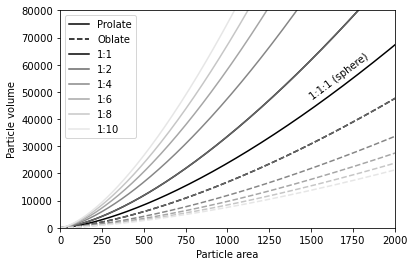

In [18]:
ax = plt.figure()

plt.plot(volume_data['Areas'], volume_data[f'vol_pro_{ARs[0]}'],\
         label='Prolate',color='0')
plt.plot(volume_data['Areas'], volume_data[f'vol_ob_{ARs[0]}'],\
         linestyle='dashed', label='Oblate',color='0')
plt.plot(volume_data['Areas'], volume_data['vol_1'],\
         label=f'1:1',color='0')

colour=np.linspace(0.4,0.9,len(ARs))

for i,AR in enumerate(ARs):
    plt.plot(volume_data['Areas'], volume_data[f'vol_pro_{AR}'],\
             label=f'1:{AR}',c=str(colour[i]))
    plt.plot(volume_data['Areas'], volume_data[f'vol_ob_{AR}'],\
             linestyle='dashed',c=str(colour[i]))    

plt.xlim([0,2000])
plt.ylim([0,80000])
plt.xlabel('Particle area')
plt.ylabel('Particle volume')
plt.legend(loc='upper left')
ax.text(0.7,0.74,'1:1:1 (sphere)', ha='left', va='top', rotation=37)
#plt.savefig('Aspect_ratio_volumes', format='eps')

In [19]:
error_data = pd.DataFrame()
# Calculates the % error for each aspect ratio
for AR in ARs:
    error_data[f'er_pro_{AR}'] = abs(((volume_data[f'vol_pro_{AR}']- \
        volume_data[f'vol_1'])/volume_data[f'vol_1'])*100)
    error_data[f'er_ob_{AR}'] = abs(((volume_data[f'vol_ob_{AR}']- \
        volume_data[f'vol_1'])/volume_data[f'vol_1'])*100)
    
error_data.head(2)

,er_pro_2,er_ob_2,er_pro_4,er_ob_4,er_pro_6,er_ob_6,er_pro_8,er_ob_8,er_pro_10,er_ob_10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.421356,29.289322,100.0,50.0,144.948974,59.175171,182.842712,64.644661,216.227766,68.377223


In [20]:
# Creates two new arrays to separate out the dataframe columns
across_ARs_pro = np.zeros(len(ARs)+1)
across_ARs_ob = np.zeros(len(ARs)+1)

# Collects the prolate and oblate values into separate arrays
for i in range(1,len(across_ARs_pro)):
    across_ARs_pro[i] = error_data.iloc[1,2*(i)-2]
    across_ARs_ob[i] = error_data.iloc[1,2*(i)-1]

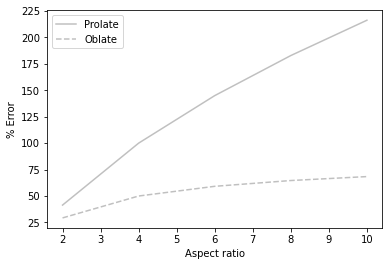

In [21]:
# Plots the prolate and oblate errors against aspect ratio
plt.plot(ARs, across_ARs_pro[1:], color='silver', label='Prolate')
plt.plot(ARs, across_ARs_ob[1:], color='silver',\
         linestyle='dashed', label='Oblate')
plt.xlabel('Aspect ratio')
plt.ylabel('% Error')
plt.legend(loc='upper left')
#plt.savefig('aspect_ratio_error', format='eps')